In [154]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import graphviz as gx
%matplotlib inline

In [155]:
g = nx.Graph()

In [156]:
filepath = 'AdjacencyMatrix.txt'  
with open(filepath) as fp:  
    line = fp.readline()
    while line:
        new_line = line.strip().split("\t")
        g.add_node(new_line[0])
        if len(new_line)>1:
            adjacency = new_line[1].strip().split(" ")
            i = 0
            while i < len(adjacency):
                g.add_node(adjacency[i])
                g.add_edge(new_line[0], adjacency[i])
                i +=1
        line = fp.readline()

In [157]:
g.number_of_nodes()

6

In [158]:
g.number_of_edges()

6

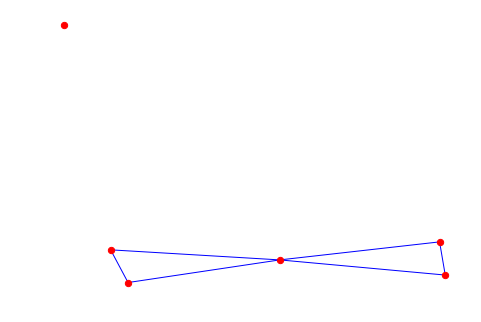

In [163]:
nx.draw(g, node_size=40, edge_color='b', node_color='r', edge_vmin=1.0, edge_vmax=2.0, with_labels=False)


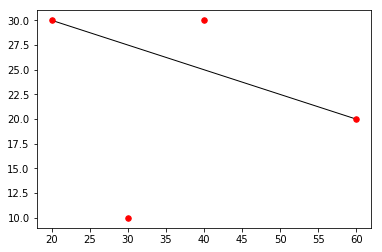

In [162]:
pos = {1: (20, 30), 2: (40, 30), 3: (30, 10)}
pos[0] =(60,20)
X=nx.Graph()
node_list = [0,2,3]
node_list.append(1)
X.add_edge(0,1)
nx.draw_networkx(X,pos,node_size=30,nodelist=node_list,node_color='r', with_labels=False)